https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.81 ms (started: 2021-09-08 12:42:53 +00:00)


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
#from sklearn.cross_validation import cross_val_score

#from sklearn.model_selection import cross_val_predict

# define columns set
cols = ['Unnamed: 0', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',	 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Inbound', 'Label']
df = pd.read_csv('/content/drive/MyDrive/ColabFiles/Sample1L/Merged_83.csv', low_memory=False, names=cols, skiprows=1, index_col=None)
# low_memory=True in read_csv leads to non documented, silent errors

# set Features and Label
X = df.drop('Label', axis = 1)
y = df['Label']
print (X.shape, y.shape)
#X = df.iloc[:, 0:80] # read first 80 columns starting index 0
#y = df[['Label']] # read Label

# Normalize X, because of -ve values
scaler = preprocessing.MinMaxScaler()
normalized_X = scaler.fit_transform(X)

labelencoder = preprocessing.LabelEncoder()
y = labelencoder.fit_transform(y)
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

# create an instance of RandomForest Classifier
#scoring1 = ['accuracy','precision_macro', 'recall_macro','f1_macro']
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
#myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)

scoring = {'acc': make_scorer(accuracy_score),
           'ps': make_scorer(precision_score, average='macro', zero_division = 1),
           'rs': make_scorer(recall_score, average='macro'),
           'fs': make_scorer(f1_score, average='macro'),
           'roc':make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)}


#scoring = {'acc': 'accuracy', 'ps': 'precision_macro', 'rs': 'recall_macro', 'fs': 'f1_macro'}
scores = cross_validate(classifier, normalized_X, y, scoring=scoring, cv=5, return_train_score=True)
#ROC_scores = cross_validate(classifier, normalized_X, y, scoring= myscore, cv=5)

print(scores.keys())
print('Accuracy Score: ', scores['test_acc'].mean())
print('Precision Score: ', scores['test_ps'].mean())
print('Recall Score: ', scores['test_rs'].mean())
print('F1 Score: ', scores['test_fs'].mean())
print('ROC-AUC Score: ', scores['test_roc'].mean())
#print(crossval_scores.keys())
#print('ROC-AUC Score: ', ROC_scores['test_score'].mean())


(1309799, 82) (1309799,)
{'BENIGN': 0, 'DNS': 1, 'LDAP': 2, 'MSSQL': 3, 'NTP': 4, 'NetBIOS': 5, 'Portmap': 6, 'SNMP': 7, 'SSDP': 8, 'Syn': 9, 'TFTP': 10, 'UDP': 11, 'UDPLag': 12, 'WebDDoS': 13}
dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_ps', 'train_ps', 'test_rs', 'train_rs', 'test_fs', 'train_fs', 'test_roc', 'train_roc'])
Accuracy Score:  0.37944293712378685
Precision Score:  0.5456471202017384
Recall Score:  0.3491797052983593
F1 Score:  0.25773163086916134
ROC-AUC Score:  0.7415100100360128
time: 59min 55s (started: 2021-09-08 12:42:53 +00:00)


In [ ]:
"""myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
ROC_scores = cross_validate(classifier, normalized_X, y, scoring= myscore, cv=5)
print('ROC-AUC Score: ', ROC_scores['test_score'].mean())"""

"myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)\nROC_scores = cross_validate(classifier, normalized_X, y, scoring= myscore, cv=5)\nprint('ROC-AUC Score: ', ROC_scores['test_score'].mean())"

time: 6.3 ms (started: 2021-09-08 13:42:48 +00:00)


https://stackoverflow.com/questions/60829057/how-to-get-multi-class-roc-auc-in-cross-validate-in-sklearn

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(classifier, normalized_X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[95134   170     0  2402   326   490   569    80     0  2414  7041     0
    734     0]
 [ 1227 73237     0   913  1491   238   700 21182    41     0     2    70
    899     0]
 [   13 74524     0   191    60    82     0 25005     0     1     2    19
    103     0]
 [   11  4723     0 39240  4317 29343     0  6747     0     1     0  1085
  14533     0]
 [  632  4839     0  2579 67216   771  2426 18300   520     0     3     0
   2714     0]
 [    5  1951     0 19192    32 53040 22673  3061     3     5     2     2
     34     0]
 [  138  3392     0 18351    36 47815 24752  5303     8   110    29     4
     62     0]
 [   34 49604     0 23480    18  5659  1048 20094     3     2     2     8
     48     0]
 [   25  1468     0 25097 16304 23714 12582  8572  2782     1     7   321
   9127     0]
 [ 2924     0     0    25     3  1194     1     2     0 67163 19963     0
   8725     0]
 [10422     3     0  1968  1135  2828     0   295     0 36897 43007    88
   3357     0]
 [   24   767     0 2

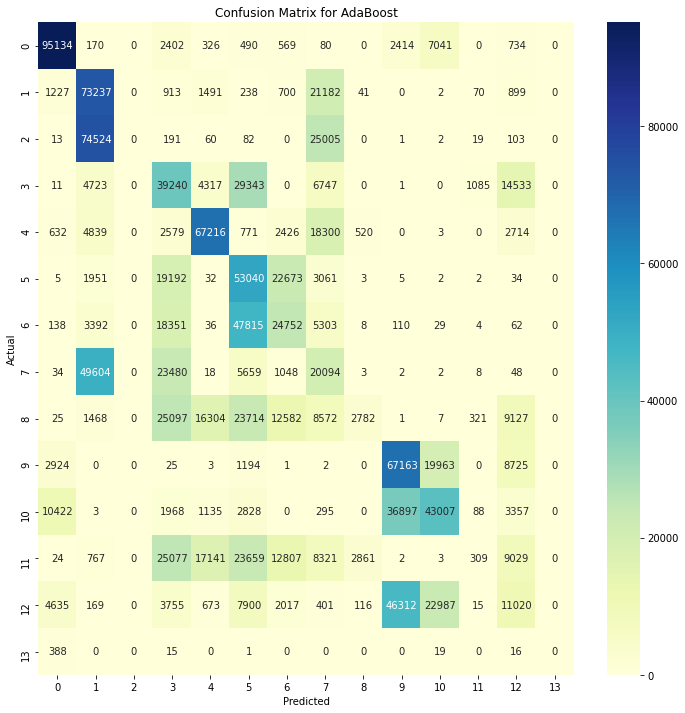

FPR: 
Predicted
0     3.275432
1     1.233032
2    -0.000000
3     1.975516
4     4.745887
5     1.485455
6    -2.684113
7     5.602085
8    -0.037922
9     1.620643
10   -7.220539
11   -0.016436
12   -1.247026
13   -0.000000
dtype: float64
TPR: 
Actual
0     0.869916
1     0.732370
2     0.000000
3     0.392400
4     0.672160
5     0.530400
6     0.247520
7     0.200940
8     0.027820
9     0.671630
10    0.430070
11    0.003090
12    0.110200
13    0.000000
dtype: float64
time: 3.94 s (started: 2021-09-08 14:31:32 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_classes = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(12,12)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y, y_pred, labels=labels)
    #cm_sum = np.sum(cm, axis=1, keepdims=True)
    #cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
          # p = cm_perc[i, j]
            #if i == j:
               # s = cm_sum[i]
               # annot[i, j] = '%d' % (c)
           # elif c == 0:
               # annot[i, j] = ''
            #else:
            annot[i, j] = '%d' % (c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title('Confusion Matrix for AdaBoost')
    sns.heatmap(cm, annot=annot, cmap='YlGnBu', fmt='', ax=ax)
    filename = '/content/drive/MyDrive/ColabFiles/KFold_5/CM83_adaboost.png'
    plt.savefig(filename)
    plt.show()

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('FPR: ')
    print(FPR)
    print('TPR: ')
    print(TPR)
    #print(classifier.classes_)
cm_analysis(y, y_pred, y_classes, ymap=None, figsize=(12,12))